# Лабораторная работа 6: численный поиск экстремума функции многих переменных

### Задание 1

*Найти точку максимума функции $f(x_1, x_2) =7-3\cdot(x_1+4)^2-2\cdot(x_2-3)^2; [x_1^0= -2, x_2^0= 2]$ градиентным
методом с дроблением шага.$(x_1^0,x_2^0)$-начальная точка. Построить график функции. В окрестности точки максимума оценить овражность, построить
линии уровня и траекторию поиска.*

Большинство процессов, используемых для приближенного нахожения экстремума, можно представить как итерационные в виде: $x^{k+1} = x^k + α^kp^k$, где $p^k$- вектор, определяющий направление движения от точки $x^k$ к точке $x^{k+1}$, $α^k$ - числовой множитель, величина которого задает длину шага в направлении $p^k$.

Простейшими методами первого порядка являются одношаговые методы спуска, в которых на каждом шаге вектор $p^k$ совпадает с направлением антиградиента функции $f(x)$: $p^k=-\nabla f(x^k)$ (нахождение минимума).

В градиентном методе с дроблением шага параметрами являются величины $\alpha > 0$ и $\lambda ∈ (0, 1)$. Параметр $\lambda$ называется коэффициентом дробления. Значения параметров выбираются наперед; они одни и те же для всех итераций.

Выбор $\alpha^k$ происходит следующим образом. Положив сначала $\bar{\alpha} = \alpha$, проверим неравенство $f(x^k + \bar{a}\cdot p^k) < f(x^k)$.Если оно выполнено, то берем $\alpha^k = \bar{\alpha}$. В противном случае значение $\bar{\alpha}$ изменяем, домножив его на $\lambda$ (дробление $\bar{\alpha}$). Снова проверяем неравенство. И так до тех пор, пока неравенство  не выполнится. То значение
$\bar{\alpha}$, при котором это произойдет впервые, и выбираем в качестве $\alpha^k$


Так как в работе требуется найти максимум функции $f(x_1, x_2)$, то будет искать его как минимум для функции $-f(x_1, x_2)$.

In [50]:
from scipy import *
from scipy.linalg import *
from math import log, exp,sin
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab
from matplotlib import cm
from sympy import *
init_printing()

Построим график функции

In [51]:
def f(x):
    z=7-3*(x[0]+4)**2-2*(x[1]-3)**2
    z=-z
    return z
#x[i]=x1 и x2 

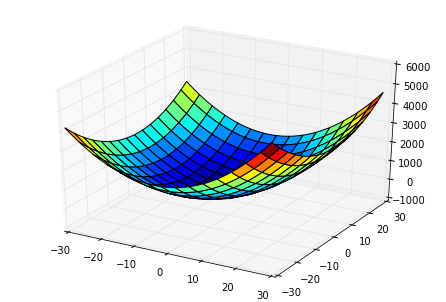

In [52]:
%matplotlib inline
x = np.arange (-30, 30, 1)
y = np.arange (-30, 30, 1)
xg, yg,=np.meshgrid(x, y)
z = f(np.meshgrid(x, y))
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xg, yg, z,rstride=4, cstride=4, cmap = cm.jet)
pylab.show()

Осуществим работу программы сразу в режиме «черного ящика» (black box)

In [53]:
def G(F,x0):
    x=np.array(x0,dtype=np.double)
    #начальные значения для x1 и x2
    X=np.array(x0,dtype=np.double)
    #значение минимума
    l=0.5
    #коэффициент лямбда
    a=1
    #начальное значение для альфа
    
    while True:
        grad=[]
        #ищем градиент
        for i in range(len(x0)):
            #применяем формулы численного дифференцирования для нахождения градиента
            a1=F(x)
            #в x0
            x[i]=x[i]+0.01
            a2=F(x)
            #в x0+0.01
            x[i]=x[i]+0.01
            a3=F(x)
            #в x0+0.02
            
            df=(-3*a1+4*a2-a3)/0.02
            #формула численного дифференцирования
            
            x[i]=x[i]-0.02
            
            grad.append(df)
        grad=np.array(grad,dtype=np.double) 
        
        while F((x-a*grad))>F((x)) or F((x-a*grad))==F((x)):
            a=a*l
            
        #итерационный процесс
        xn=x-a*grad
        
        if norm(F(x)-F(xn))<0.001:
            break  
        #построчное добавление, чтобы оценить количество шагов, совершенных до попадания в минимум
        X=np.row_stack((X, xn))    
        x=xn 
    return X

A=G(f,[-2,2])
print("Попадание в минимум за 7 шагов")
print(A)    

Попадание в минимум за 7 шагов
[[-2.        2.      ]
 [-5.        3.      ]
 [-3.5       3.      ]
 [-4.25      3.      ]
 [-3.875     3.      ]
 [-4.0625    3.      ]
 [-3.96875   3.      ]
 [-4.015625  3.      ]]


Построим линии уровня и траектории поиска

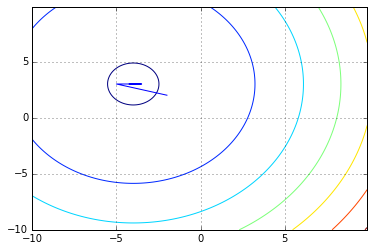

In [54]:
% matplotlib inline
x = np.arange (-10, 10, 0.1)
y = np.arange (-10, 10, 0.1)
xg, yg = np.meshgrid(x, y)
z=f(np.meshgrid(x, y))
#линии уровня
pylab.contour(xg, yg, z)

#траектории поиска
pylab.plot(A[:,0], A[:,1])
pylab.grid(True)
pylab.show()

Оценка овражности: нужно составить гессиан (в точке минимума) - матрица, образованная вторыми частными производными, затем найти собственные числа этой матрицы. Тогда овражность - это отношение максимального к минимальному собственному числу

In [55]:
def f(x1,x2):
    z=7-3*(x1+4)**2-2*(x2-3)**2
    z=-z
    return z

In [56]:
#гессиан
H11=6
H12=0
H21=0
H22=4
H=np.array([[H11,H12],[H21,H22]])
            
            
print("Гессиан:")
print(H)

#поиск собственных значений
HH=eigvals(H)
print("Собственные значения гессиана:")
print(HH)

o=max(HH)/min(HH)
print('Овражность о =', o)

Гессиан:
[[6 0]
 [0 4]]
Собственные значения гессиана:
[ 6.+0.j  4.+0.j]
Овражность о = (1.5+0j)


### Задание 2: обеспечить работу программы с функциями любой размерности (до  10 включительно)

In [57]:
def f (x):
    z=(x[0]-1)**2+(x[1]-5)**2+(x[2]+2)**2+(x[3]+3)**2+(x[4]-9)**2+(x[5]-12)**2+(x[6]+6)**2+(x[7]+7)**2+(x[8]-14)**2+(x[9]-10)**2
    return z

In [58]:
def G(F,x0):
    x=np.array(x0,dtype=np.double)
    X=np.array(x0,dtype=np.double)
    l=0.5
    a=1
    m=a
    while True:
        grad=[]
        for i in range(len(x0)):
            a1=F(x)
            x[i]=x[i]+0.01
            a2= F(x)
            x[i]=x[i]+0.01
            a3=F(x)
            df=(-3*a1+4*a2-a3)/0.02
            x[i]=x[i]-0.02
            grad.append(df)
        grad=np.array(grad,dtype=np.double) 
        while  a==m or F((x-a*grad))>F((x)):
            a=a*l
        xn=x-a*grad
        if norm(F(x)-F(xn))<0.001:
            break      
        x=xn
    return xn

A=G(f,[-3,9,2,0,4,0,5,-4,1,-1])
print(A)    

[  1.   5.  -2.  -3.   9.  12.  -6.  -7.  14.  10.]


Выполнила: Тюрина Анастасия, 431 группа